# Projet ml-in-the-clouds

## Imports

In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import re
from collections import Counter
import random as r

In [4]:
df = pd.read_csv("emotions_train.csv")

## Introduction

`Projet Visant à prédire l'émotion de l'utilisateur lors de la rédaction d'un message sur les réseaux sociaux`

## Data Exploration

In [5]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i was so stubborn and that it took you getting...,joy
freq,2,7029


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

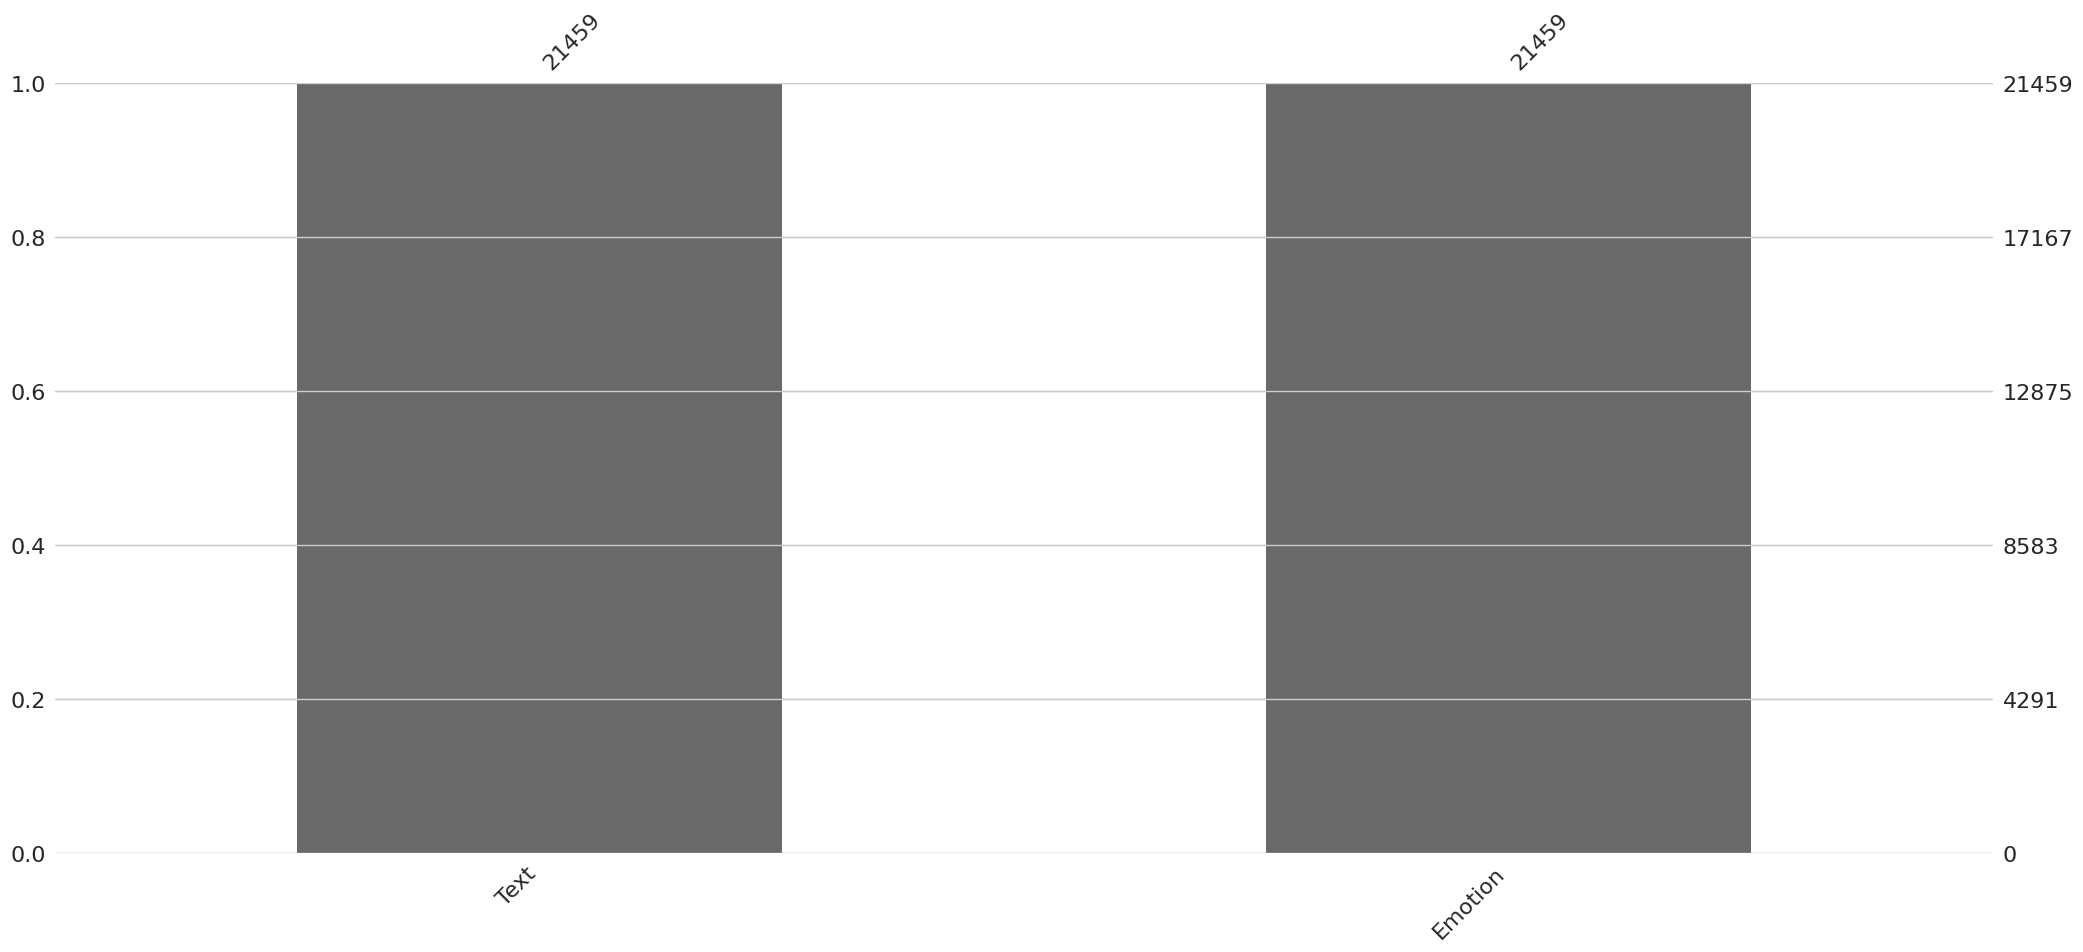

In [7]:
msno.bar(df, sort='ascending')

In [8]:
df.Emotion.value_counts()

Emotion
joy         7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

### Testing differents sampling methods

In [9]:


df_test = pd.read_csv('emotions_test.csv')
df_test.rename(columns={'sentiment': 'Emotion'}, inplace=True)
df_test.rename(columns={'content': 'Text'}, inplace=True)


In [10]:
df_love_surprise = df_test.loc[(df_test['Emotion'] == 'love') | (df_test['Emotion'] == 'surprise'), ['Emotion', 'Text']]
df_fusion = pd.concat([df, df_love_surprise])


In [11]:

df_fusion.to_csv('df_fusion_oversample.csv', index=False)

## Data Cleaning

Qu'est ce que l'AutoML ?
Il permet d'automatiser une grande partie du processus de création d'un modèle de machine learning.
Ces outils proposant une interface graphique plus ou moins intuitive et ergonomique rendent plus abordable
l'utilisation du machine learning. Effectivement, la plupart de ces outils sont en no-code ou low-code.
Les Avantages !
La performance, l'éfficacité (gain de temps et de d'argent), on ajoute à ça qu'il n'est pas necessaire d'être un expert
pour manipuler ces outils.

Qu'est ce que le MLaaS ?
Le machine learning as a service (MLaaS) est un service cloud mettant à disposition par exemple des outils d'AutoML
Les Avantages sont que le service cloud résout les fortes demandes en ressource de calcul du machine learning.
De plus il permet aux entreprises par exemple de se reposer sur quelque chose de déjà exsistant et donc laisser l'infrastructure
de ses solutions hors de leurs locaux.

Les outils d'AutoML les plus connus sont notamment Vertex AI, Sagemaker, Azure et DataRobot
Google Cloud Platform et Vertex AI sont le service could mis en place par google ainsi que sont outils d'AutoML déployé sur le cloud.
Cet outils permet d'utiliser le l'IA générative.
AWS et Sagemaker sont la plateforme cloud et le service d'AutoML de Amazon 
De même pour Azure et Azure machine learning, associés à Microsoft

## Words exploration using Count

In [12]:
df.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [13]:
def extract_location_ml(location):
    stopwords = set(['I', 'DIDNT', 'AM','YOU', 'IM', 'THE', 'FROM', 'SO', 'GO', 'BUT', 'WAS', 'AT', 'HER', 'NOT', 'OF',\
        'TO', 'IN', 'THAT', 'WASN', 'ON', 'AND', 'MY', 'GET', 'BEEN', 'FOR', 'ME', 'A', 'IT', 'AN', 'WITH', 'TOO', 'AS', \
            'DO', 'IS', 'M', 'THEN', 'BY'])

    filtered_words = [word.upper() for word in re.findall(r'\b[A-Za-z]+\b', location) if word.upper() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common_word = word_counts.most_common(10)
    if most_common_word:
        return most_common_word[0]
df["Test_Counters"] = df['Text'].apply(extract_location_ml)

# Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
# Test_Counters.head(16)
df["Test_Counters"]
temp_list = list(df["Test_Counters"])
r.shuffle(temp_list)
temp_list

[('STILL', 1),
 ('BLAH', 5),
 ('FEEL', 1),
 ('JUST', 2),
 ('FEELING', 1),
 ('FEEL', 1),
 ('JUST', 1),
 ('STARTED', 2),
 ('FEEL', 1),
 ('FEEL', 1),
 ('REALLY', 1),
 ('WHEN', 1),
 ('THINK', 1),
 ('YEAST', 2),
 ('WONT', 1),
 ('DECISION', 2),
 ('FEEL', 1),
 ('SICK', 1),
 ('FEEL', 1),
 ('MORE', 2),
 ('SORRY', 1),
 ('MOTHER', 3),
 ('HOW', 2),
 ('FEELING', 1),
 ('DID', 1),
 ('FEELING', 1),
 ('UP', 2),
 ('HAVING', 2),
 ('REALLY', 2),
 ('STILL', 1),
 ('THEY', 2),
 ('ALMOST', 2),
 ('FEEL', 1),
 ('K', 2),
 ('FEELING', 1),
 ('FEEL', 2),
 ('DID', 1),
 ('FEEL', 1),
 ('LEFT', 1),
 ('KIND', 2),
 ('CAN', 1),
 ('ID', 1),
 ('WANT', 1),
 ('WRITE', 1),
 ('PHILIPPINES', 2),
 ('ADMIT', 1),
 ('MUST', 1),
 ('THIS', 2),
 ('JUST', 1),
 ('SUCK', 1),
 ('WILL', 1),
 ('GOT', 4),
 ('STILL', 1),
 ('STILL', 1),
 ('KNOW', 2),
 ('ALSO', 1),
 ('HAPPY', 1),
 ('ARE', 2),
 ('EMAIL', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('THREATENED', 2),
 ('FEELING', 1),
 ('DELIGHTED', 1),
 ('HAVING', 2),
 ('FEEL', 1),
 ('FEELING',

In [14]:
df[df.Text.apply(lambda x: x.lower().find("feel"))!=-1]

,Text,Emotion,Test_Counters
0,i didnt feel humiliated,sadness,"(FEEL, 1)"
1,i can go from feeling so hopeless to so damned...,sadness,"(CAN, 1)"
2,im grabbing a minute to post i feel greedy wrong,anger,"(GRABBING, 1)"
3,i am ever feeling nostalgic about the fireplac...,love,"(EVER, 1)"
4,i am feeling grouchy,anger,"(FEELING, 1)"
...,...,...,...
21201,"Far from experiencing simple gratitude , such ...",fear,"(FAR, 1)"
21202,She was still feeling a little anxious when sh...,fear,"(SHE, 4)"
21232,"Feeling thoroughly disquieted , she left her r...",fear,"(FEELING, 1)"
21272,"I do n't very often feel frightened , but then...",fear,"(N, 2)"


In [15]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [16]:
common_words_by_emotions_df = []
for emotion in df.Emotion.unique():
    df["Test_Counters"] = df['Text'][df.Emotion == emotion].apply(extract_location_ml)
    # Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
    # Test_Counters.head(16)
    print(df["Test_Counters"])


0        (FEEL, 1)
1         (CAN, 1)
2              NaN
3              NaN
4              NaN
           ...    
21454          NaN
21455          NaN
21456          NaN
21457          NaN
21458          NaN
Name: Test_Counters, Length: 21459, dtype: object
0                  NaN
1                  NaN
2        (GRABBING, 1)
3                  NaN
4         (FEELING, 1)
             ...      
21454              NaN
21455              NaN
21456              NaN
21457              NaN
21458              NaN
Name: Test_Counters, Length: 21459, dtype: object
0              NaN
1              NaN
2              NaN
3        (EVER, 1)
4              NaN
           ...    
21454          NaN
21455          NaN
21456          NaN
21457          NaN
21458          NaN
Name: Test_Counters, Length: 21459, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21454    NaN
21455    NaN
21456    NaN
21457    NaN
21458    NaN
Name: Test_Counters, Length: 21459, 

In [17]:
## Preparing Data

In [18]:
df = pd.read_csv("emotions_train.csv")
min_count = df['Emotion'].value_counts().min()

# Create a list to hold the undersampled DataFrames
undersampled_dfs = []

# Loop over each unique emotion
for emotion in df['Emotion'].value_counts().index:
    # Sample min_count rows from each emotion
    df_emotion = df[df['Emotion'] == emotion].sample(n=min_count, random_state=42)
    # Append the undersampled DataFrame to the list
    undersampled_dfs.append(df_emotion)

# Concatenate all the undersampled DataFrames
df_undersampling = pd.concat(undersampled_dfs)

# Shuffle the resulting DataFrame to mix the emotions
df = df_undersampling.sample(frac=1, random_state=42).reset_index(drop=True)

df_undersampling.to_csv('df_undersampling_train.csv', index=False)

In [19]:
## Multinomial Naive Bayes Algorithm

In [20]:
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Feature/Target
X = df["Text"]
y = df["Emotion"]

# Pipeline vectorizer + Naive Bayes
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

# Cross-validation
cv_results = cross_validate(pipeline_naive_bayes, X, y, cv = 5, scoring = ["accuracy"])
cv_results
average_accuracy = cv_results["test_accuracy"].mean()
np.round(average_accuracy,5)

0.76015

In [21]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of parameters
# parameters = {
#     'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'tfidfvectorizer__max_df': [0.7, 0.8, 0.9, 1.0],
#     'tfidfvectorizer__min_df': [1, 2, 5],
#     'tfidfvectorizer__max_features': [None, 5000, 10000],
#     'multinomialnb__alpha': [0.01, 0.1, 0.5, 1, 10]
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     pipeline_naive_bayes,
#     parameters,
#     scoring = "accuracy",
#     cv = 5,
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(df.Text,df.Emotion)

# # Best score
# print(f"Best Score = {grid_search.best_score_}")

# # Best params
# print(f"Best params = {grid_search.best_params_}")

In [22]:
best_params_temp = {'multinomialnb__alpha': 1, 'tfidfvectorizer__max_df': 0.7, 'tfidfvectorizer__max_features': None, 'tfidfvectorizer__min_df': 2, 'tfidfvectorizer__ngram_range': (1, 1)}

In [23]:
test_df = pd.read_csv("emotions_test.csv")
test_df.head(1)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...


In [24]:
test_df.sentiment.value_counts()

sentiment
neutral       8638
worry         8459
joy           5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [25]:
test_df.sentiment.value_counts().index

Index(['neutral', 'worry', 'joy', 'sadness', 'love', 'surprise', 'fun',
       'relief', 'hate', 'empty', 'enthusiasm', 'boredom', 'anger'],
      dtype='object', name='sentiment')

In [26]:
df.Emotion.unique()

array(['joy', 'surprise', 'love', 'fear', 'sadness', 'anger'],
      dtype=object)

In [27]:
test_df[test_df.sentiment == "boredom"]

,tweet_id,sentiment,author,content
112,1956993007,boredom,villa_ld,i'm so tired
316,1957038475,boredom,kameezy,Waiting in line @ tryst
345,1957044366,boredom,snoopync18,why did i agree to work a double shift
495,1957083786,boredom,munkeysmomma,"is really, really bored... I guess I will go t..."
583,1957102562,boredom,Quastbabynumbr5,So deep its priecing my soul
...,...,...,...,...
38952,1753743277,boredom,wyndwitch,@carlysmum lol takes some getting use to Just...
38961,1753743548,boredom,Misses_Gola,@lovely_sara I'm sitting in the bus to dublin ...
39105,1753760150,boredom,jarrelt,@astrylnaut yeah talking to you was too boring
39604,1753851840,boredom,chickenpantz,"just finished some Sunday cleaning, waiting to..."


In [28]:
emotions_to_keep = ['joy','surprise', 'love', 'sadness', 'anger', 'hate', 'boredom']
test_df = test_df[test_df.sentiment.isin(emotions_to_keep)].reset_index().drop(columns="index")
test_df.sentiment.unique()

array(['sadness', 'surprise', 'love', 'hate', 'joy', 'boredom', 'anger'],
      dtype=object)

In [29]:
test_df.sentiment = test_df.sentiment.apply(lambda x : "sadness" if x == "boredom" else x)
test_df.sentiment = test_df.sentiment.apply(lambda x : "anger" if x == "hate" else x)
test_df.sentiment.unique()

array(['sadness', 'surprise', 'love', 'anger', 'joy'], dtype=object)

In [30]:
if "tweet_id" in test_df.columns:
    test_df.drop(columns= ["tweet_id", "author"], inplace=True)
test_df.columns = ["Emotion", "Text"]
test_df.head(10)

,Emotion,Text
0,sadness,Layin n bed with a headache ughhhh...waitin o...
1,sadness,Funeral ceremony...gloomy friday...
2,sadness,"I should be sleep, but im not! thinking about ..."
3,sadness,@charviray Charlene my love. I miss you
4,sadness,@kelcouch I'm sorry at least it's Friday?
5,sadness,Ugh! I have to beat this stupid song to get to...
6,sadness,@BrodyJenner if u watch the hills in london u ...
7,surprise,Got the news
8,sadness,The storm is here and the electricity is gone
9,love,@annarosekerr agreed


In [31]:
test_df.Emotion.value_counts()

Emotion
sadness     5344
joy         5209
love        3842
surprise    2187
anger       1433
Name: count, dtype: int64

In [32]:
min_count = test_df['Emotion'].value_counts().min()

# Create a list to hold the undersampled DataFrames
undersampled_dfs = []

# Loop over each unique emotion
for emotion in test_df['Emotion'].value_counts().index:
    # Sample min_count rows from each emotion
    df_emotion = test_df[test_df['Emotion'] == emotion].sample(n=min_count, random_state=42)
    # Append the undersampled DataFrame to the list
    undersampled_dfs.append(df_emotion)

# Concatenate all the undersampled DataFrames
df_undersampling = pd.concat(undersampled_dfs)

# Shuffle the resulting DataFrame to mix the emotions
test_df = df_undersampling.sample(frac=1, random_state=42).reset_index(drop=True)


In [33]:
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Feature/Target
X = test_df["Text"]
y = test_df["Emotion"]

# Pipeline vectorizer + Naive Bayes
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

# Cross-validation
cv_results = cross_validate(pipeline_naive_bayes, X, y, cv = 5, scoring = ["accuracy"])
cv_results
average_accuracy = cv_results["test_accuracy"].mean()
np.round(average_accuracy,5)

0.43866

#### Deleted attempt at eraseing @username from text

In [34]:
# def remove_at_text(input_string):
#     return re.sub(r'@text', '', input_string)

# test_df['Text'] = test_df['Text'].apply(lambda x: remove_at_text(x))

In [35]:
X = test_df["Text"]
y = test_df["Emotion"]

# Pipeline vectorizer + Naive Bayes
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

# Cross-validation
cv_results = cross_validate(pipeline_naive_bayes, X, y, cv = 5, scoring = ["accuracy"])
cv_results
average_accuracy = cv_results["test_accuracy"].mean()
np.round(average_accuracy,5)

0.43866

## Discovering Pycaret

In [36]:
X = df["Text"]
y = df["Emotion"]

# Pipeline vectorizer + Naive Bayes
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)
pipeline_naive_bayes.fit(X, y)
X_transformed = pipeline_naive_bayes.named_steps['tfidfvectorizer'].transform(X)
df_transformed = pd.DataFrame(X_transformed.toarray())
df_transformed['Emotion'] = y.values

In [37]:
# import pycaret classification and init setup

s = setup(df_transformed, target = 'Emotion', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(5274, 9142)"
5,Transformed data shape,"(5274, 9142)"
6,Transformed train set shape,"(3691, 9142)"
7,Transformed test set shape,"(1583, 9142)"
8,Numeric features,9141
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

Session id: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions.

Target type: Binary, Multiclass, or Regression. The Target type is automatically detected.

Label Encoding: When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type.

Original data shape: Shape of the original data prior to any transformations.

Transformed train set shape : Shape of transformed train set

Transformed test set shape : Shape of transformed test set

Numeric features : The number of features considered as numerical.

Categorical features : The number of features considered as categorical.

In [38]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [39]:
exp.setup(df_transformed, target = 'Emotion', session_id = 124)

,Description,Value
0,Session id,124
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(5274, 9142)"
5,Transformed data shape,"(5274, 9142)"
6,Transformed train set shape,"(3691, 9142)"
7,Transformed test set shape,"(1583, 9142)"
8,Numeric features,9141
9,Preprocess,True


# Motherfucking way too long to execute

In [40]:
# best = compare_models()

In [85]:
# Specify the models to include in the comparison
models_to_compare = ['lr'] #'lightgbm'

# Setup the classification task
clf_setup = setup(data=df_transformed, target='Emotion', session_id=43, fold=3)

# Compare the specified models
best_model = compare_models(include=models_to_compare)


KeyboardInterrupt: 

In [ ]:
# # Specify the models to include in the comparison
# models_to_compare = ['lr'] #'lightgbm'

# # Setup the classification task
# clf_setup = setup(data=df_transformed, target='Emotion', session_id=43, fold=3)

# # Compare the specified models
# best_model = compare_models(include=models_to_compare)


,Description,Value
0,Session id,43
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(5274, 9142)"
5,Transformed data shape,"(5274, 9142)"
6,Transformed train set shape,"(3691, 9142)"
7,Transformed test set shape,"(1583, 9142)"
8,Numeric features,9141
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:27:13
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7342,0.0000,0.7342,0.7330,0.7323,0.6811,0.6815,9.0233
knn,K Neighbors Classifier,0.5535,0.8246,0.5535,0.5635,0.5531,0.4642,0.4661,13.4300
lda,Linear Discriminant Analysis,0.3671,0.0000,0.3671,0.3870,0.3653,0.2405,0.2439,19.2000


KeyboardInterrupt: 

In [42]:
# models()['Name'].index

In [43]:
model_tags = ['lr', 'knn', 'nb', 'dt', 'svm', 'rf', 'lda', 'et', 'dummy'] # long ass mf 'mlp', 'lightgbm' # banned 'ridge'

#, 'rbfsvm' 'qda','ada', 'gpc' 'gbc',
# Setup the classification task
clf_setup = setup(data=df_transformed, target='Emotion', session_id=43, fold=2)

# Compare the specified models
best_model = compare_models(include=model_tags)

save_model(best_model, 'first_best_model')


,Description,Value
0,Session id,43
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(5274, 9142)"
5,Transformed data shape,"(5274, 9142)"
6,Transformed train set shape,"(3691, 9142)"
7,Transformed test set shape,"(1583, 9142)"
8,Numeric features,9141
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7879,0.9434,0.7879,0.7883,0.7866,0.7454,0.7460,3.1750
svm,SVM - Linear Kernel,0.7551,0.0000,0.7551,0.7599,0.7539,0.7061,0.7074,3.1800
lr,Logistic Regression,0.6724,0.0000,0.6724,0.6702,0.6702,0.6069,0.6073,4.1900
rf,Random Forest Classifier,0.6627,0.8880,0.6627,0.6655,0.6621,0.5952,0.5959,3.7750
dt,Decision Tree Classifier,0.6028,0.7616,0.6028,0.6202,0.6091,0.5234,0.5243,4.1150
knn,K Neighbors Classifier,0.5221,0.8044,0.5221,0.5338,0.5216,0.4265,0.4288,5.7750
nb,Naive Bayes,0.4403,0.6742,0.4403,0.4418,0.4394,0.3283,0.3288,4.4200
lda,Linear Discriminant Analysis,0.3072,0.0000,0.3072,0.3239,0.3056,0.1687,0.1705,7.1150
dummy,Dummy Classifier,0.1664,0.5000,0.1664,0.0277,0.0475,0.0000,0.0000,1.7500


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29',...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=

In [44]:
tune_model(best_model, optimize = 'Accuracy', n_iter=200, choose_better=True, early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7519,0.9330,0.7519,0.7571,0.7524,0.7023,0.7032
1,0.7675,0.9441,0.7675,0.7770,0.7630,0.7210,0.7243
Mean,0.7597,0.9386,0.7597,0.7670,0.7577,0.7116,0.7138
Std,0.0078,0.0056,0.0078,0.0099,0.0053,0.0094,0.0106


Fitting 2 folds for each of 200 candidates, totalling 400 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

# can do  save=True on plot_model

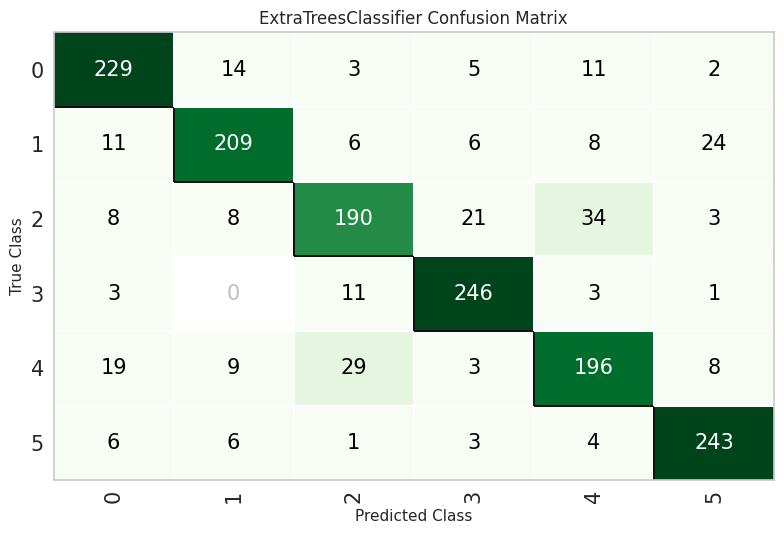

In [45]:
# plot confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [46]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

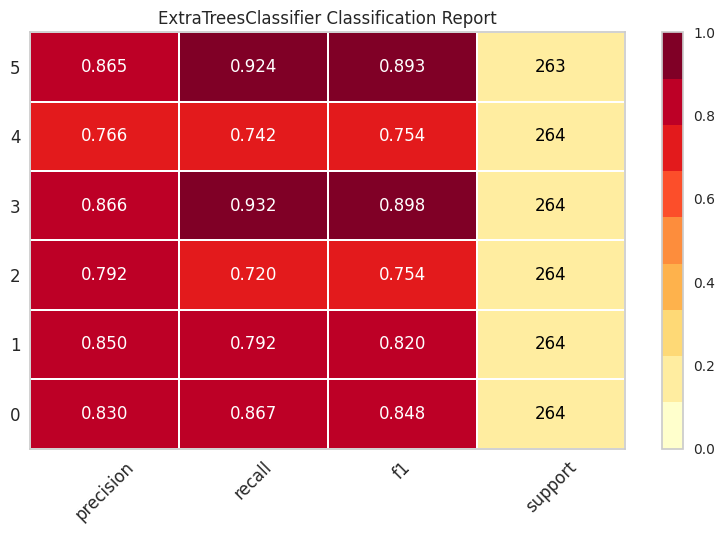

In [47]:
# plot Classification Report
plot_model(best_model, plot = 'class_report') # control size scale = 2  save=True

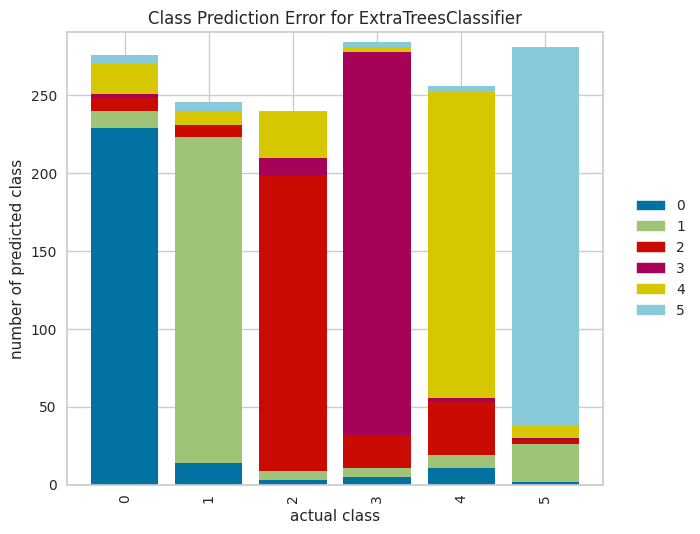

In [48]:
# plot Class Prediction Error
plot_model(best_model, plot = 'error')

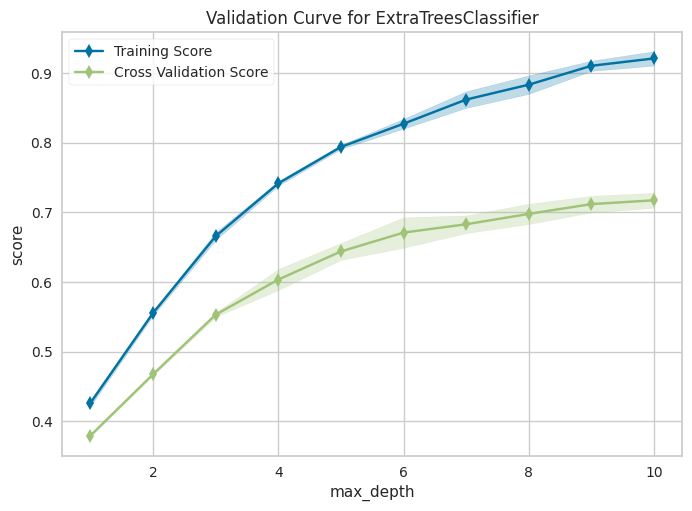

In [49]:
# plot Class Validation Curve
plot_model(best_model, plot = 'vc')

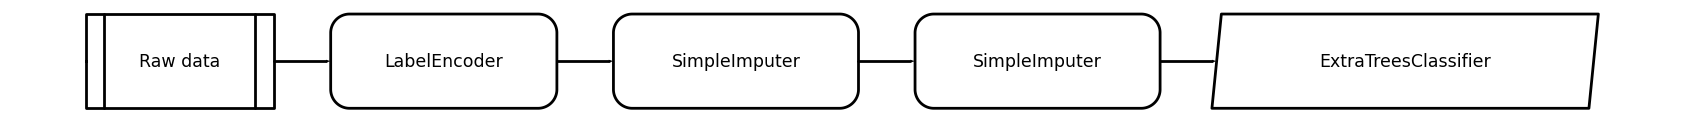

In [50]:
# plot Schematic drawing of the preprocessing pipeline
plot_model(best_model, plot = 'pipeline')

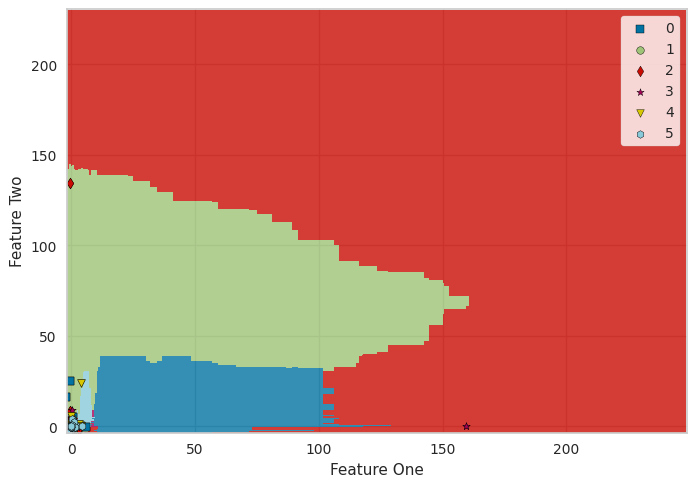

In [51]:
# from pycaret.classification import setup, compare_models, plot_model

# # Ensure you have loaded and preprocessed your data correctly
# # For example:
# # data = load_data()
# # data = preprocess_data(data)

# # Set up the pycaret environment
# s = setup(df, target='target_column')

# # Compare models and select the best one
# best_model = compare_models()

# # Plot the decision boundary
try:
    plot_model(best_model, plot='boundary')
except ValueError as e:
    print(f"An error occurred: {e}")
    # Additional troubleshooting steps can be added here

In [52]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
# predict on test set
holdout_pred = predict_model(best_model)

In [54]:
holdout_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,9134,9135,9136,9137,9138,9139,9140,Emotion,prediction_label,prediction_score
3472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,surprise,surprise,0.47
3096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,sadness,0.70
4427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,anger,0.40
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,surprise,surprise,0.56
4184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,love,love,0.77


In [55]:
# save pipeline
save_model(best_model, 'current_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29',...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=

In [56]:
# load pipeline
loaded_best_pipeline = load_model('current_best_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=43, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [57]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [58]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8294,0.9598,0.8294,0.8279,0.8278,0.7953,0.7957


In [59]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')
# compare models
# best = compare_models()

In [60]:
# start mlflow server on localhost:5000
# !mlflow ui

In [61]:
# start mlflow server on localhost:5000
# !mlflow ui

In [62]:
# # define tuning grid
# dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# # tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

In [63]:
# # define tuning grid
# dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# # tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

For more details on all available search_library and search_algorithm please check the docstring.

 Some other parameters that you might find very useful in tune_model are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [64]:
# # get leaderboard
# lb = get_leaderboard()
# lb

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [65]:
automl()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [66]:
# dashboard function
# dashboard(loaded_best_pipeline, display_format ='inline')

In [ ]:
# Specify the models to include in the comparison
models_to_compare = ['lr'] #'lightgbm'

# Setup the classification task
clf_setup = setup(data=df, target='Emotion', session_id=43, fold=3)

# Compare the specified models
best_model = compare_models(include=models_to_compare)


In [89]:
# # Specify the models to include in the comparison
# models_to_compare = ['lr'] #'lightgbm'

# # Setup the classification task
# clf_setup = setup(data=df, target='Emotion', session_id=43, fold=3)

# # Compare the specified models
# best_model = compare_models(include=models_to_compare)


In [88]:
# create gradio app
create_app(best_model) # loaded_best_pipeline

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [68]:
# create api
create_api(best_model, api_name = 'my_first_api')
# run this command python my_first_api.py

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [69]:
# !python my_first_api.py

In [70]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [71]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [72]:
# !sudo service docker start

In [73]:
!docker image build -f "Dockerfile" -t my_first_api:latest .


Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?


In [74]:
final_best = finalize_model(best_model)

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [75]:
# # deploy model on aws s3
# deploy_model(final_best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [76]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [77]:
# save model
save_model(best_model, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29',...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=

In [78]:
# load model
loaded_model = load_model('my_first_model')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=43, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [79]:
# save experiment
# save_experiment('my_experiment')

In [80]:
# load experiment from disk
# exp_from_disk = load_experiment('my_experiment', data=df)

In [81]:
custom_tweets = ["You're a big piece of shit", "Ima bury your grandma", "Tryna strike a chord and it's probably a minor", \
    "I wish you the worst", "I'm wishing for you to get a happy drive by for new year !"]

self_made_data = pd.DataFrame(custom_tweets, columns=['Test'])
self_made_data

,Test
0,You're a big piece of shit
1,Ima bury your grandma
2,Tryna strike a chord and it's probably a minor
3,I wish you the worst
4,I'm wishing for you to get a happy drive by fo...


In [82]:
predictions = predict_model(loaded_model, data=self_made_data) #tuned_model # first param is best_model

KeyError: "None of [Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',\n       ...\n       '9131', '9132', '9133', '9134', '9135', '9136', '9137', '9138', '9139',\n       '9140'],\n      dtype='object', length=9141)] are in the [columns]"

In [ ]:
predictions = predict_model(loaded_from_disk, data="Ima bury your grandma")

In [ ]:
predictions = predict_model(loaded_from_disk, data="Tryna strike a chord and it's probably a minor")

AttributeError: 'str' object has no attribute 'columns'